# Import price and export price extraction program for FAO data.





In [1]:
### Load packages
library(dplyr)
library(tidyr) 
library(readxl)
library(knitr)
library(ggplot2)
### load data
setwd("H:\\Project\\Reseach\\FAO\\importPrice")
dat=read_excel("ProductionDataFAO(2014).xlsx",sheet = 1, col_names = TRUE, col_types = NULL)

# head(dat) # last two columns' name are NA, cause problems.
# last two rows are not info, which cause problems.
dat=dat[-c(nrow(dat)-1,nrow(dat)),-c(ncol(dat)-1,ncol(dat))]
# glimpse(dat)
# names(dat)
dat.value=dat %>% select(AreaCode,AreaName,ElementName,Value) %>% 
  tidyr::spread(key = ElementName, value = Value) 
# Error: Duplicate identifiers for rows (1125, 1126), 
# last two rows have to be removed at beginning
# head(dat.value)
# glimpse(dat.value)
# str(dat.value)
names(dat.value)=make.names(names(dat.value))
dat.Price=dat.value %>% mutate(ImportPrice=Import.Value/Import.Quantity, `ExportPrice` =`Export.Value`/`Export.Quantity`)
# Error: non-numeric argument to binary operator, 
# Use the make.names() function to create safe names; 
# this is used by R too to create identifiers (eg by using underscores for spaces etc)
# If you must, protect the unsafe identifiers with backticks.
#head(dat.Price)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# gather data for ploting

dat.long=dat.Price %>% select(AreaCode,AreaName,Production,ImportPrice,ExportPrice) %>% 
  gather(key=type,value=price,4:5)

## Data show some outliers
First boxplot

Warning message:
: Removed 69 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 72 rows containing non-finite values (stat_boxplot).

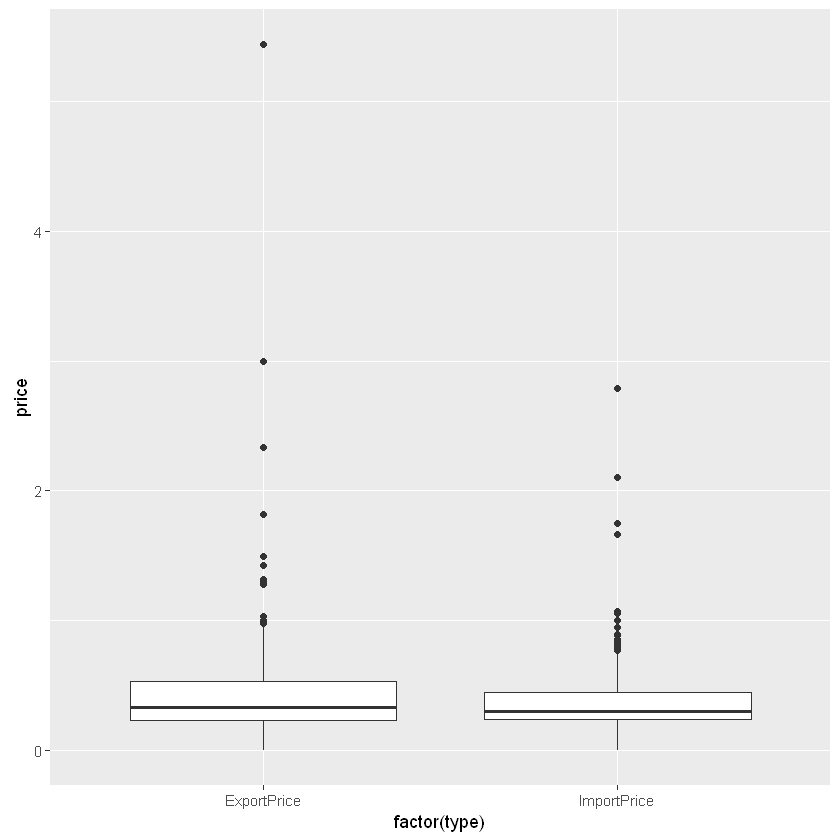

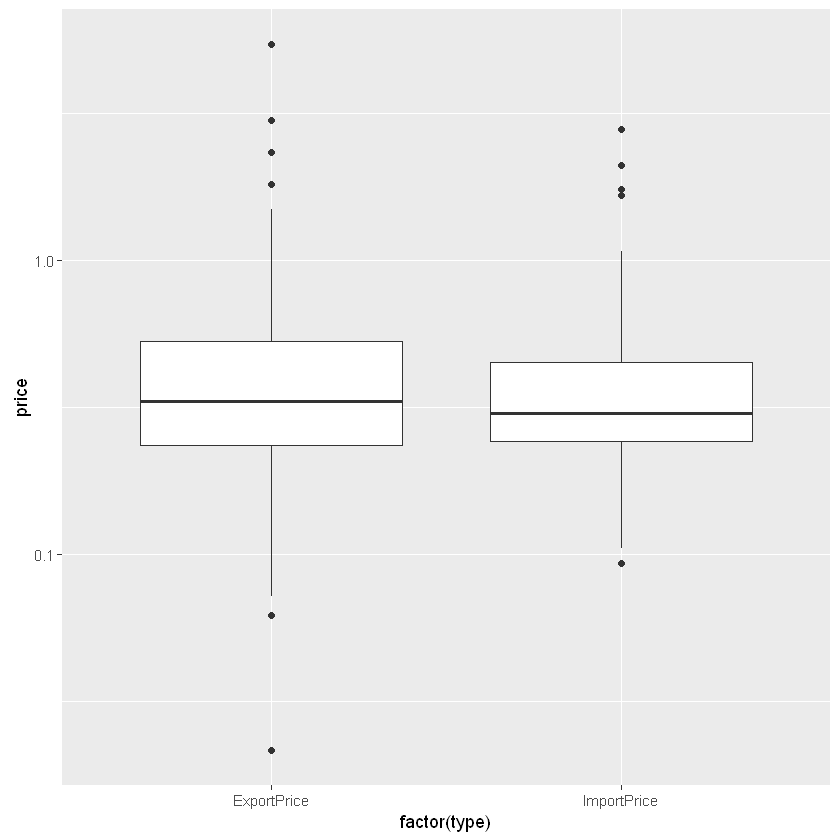

In [3]:
## show some outliers
dat.long %>% ggplot(aes(factor(type), price) ) +
  geom_boxplot() 
# log price
#dat.long %>% ggplot(aes(factor(type), price) ) +
#  geom_boxplot() + scale_y_log10()

### Look at point graph, import prices are close to export price 

Warning message:
: Removed 69 rows containing missing values (geom_point).Warning message:
: Removed 69 rows containing missing values (geom_point).

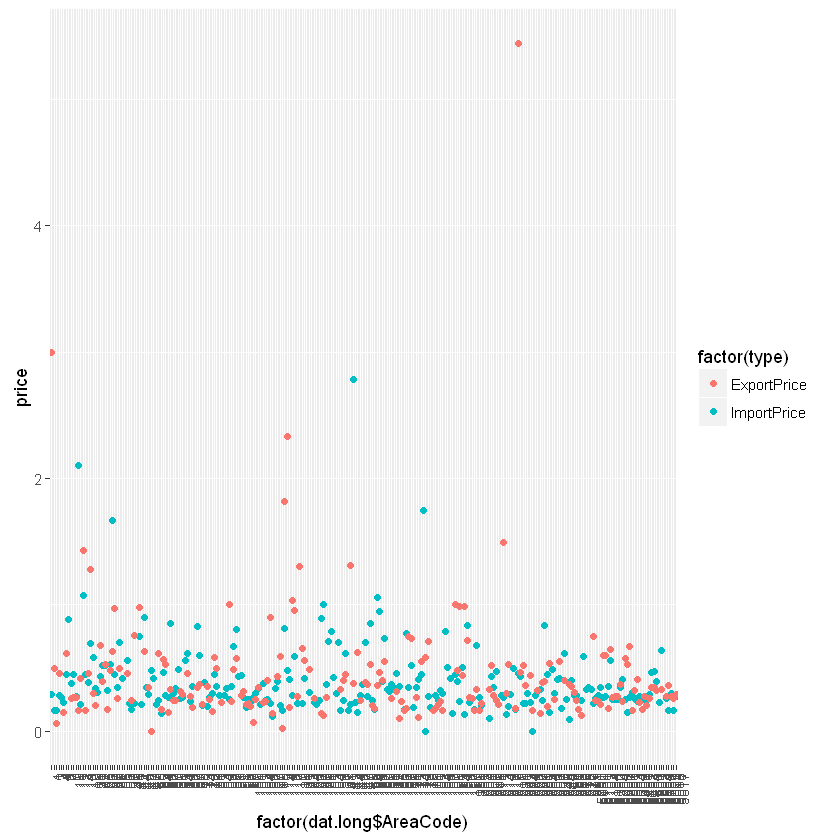

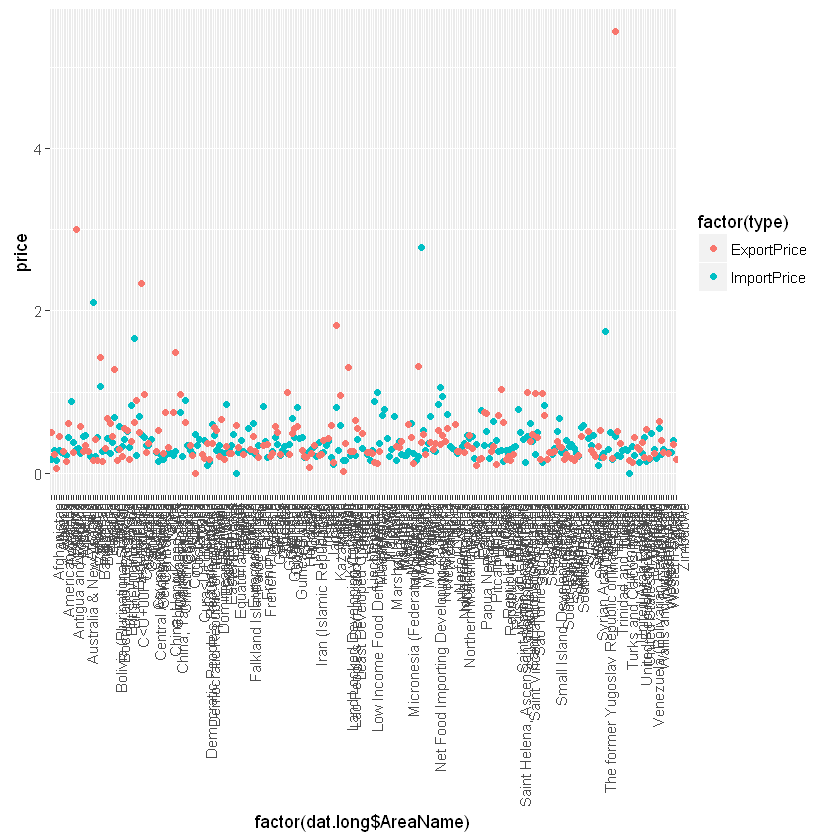

In [4]:
# outlier

dat.long %>% ggplot(aes(factor(dat.long$AreaCode), price) ) +
  geom_point(aes(colour = factor(type)))+ 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



# outlier
dat.long %>% ggplot(aes(factor(dat.long$AreaName), price) ) +
  geom_point(aes(colour = factor(type)))+ 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


### Relation b/t price and production

Warning message:
: Removed 195 rows containing missing values (geom_point).

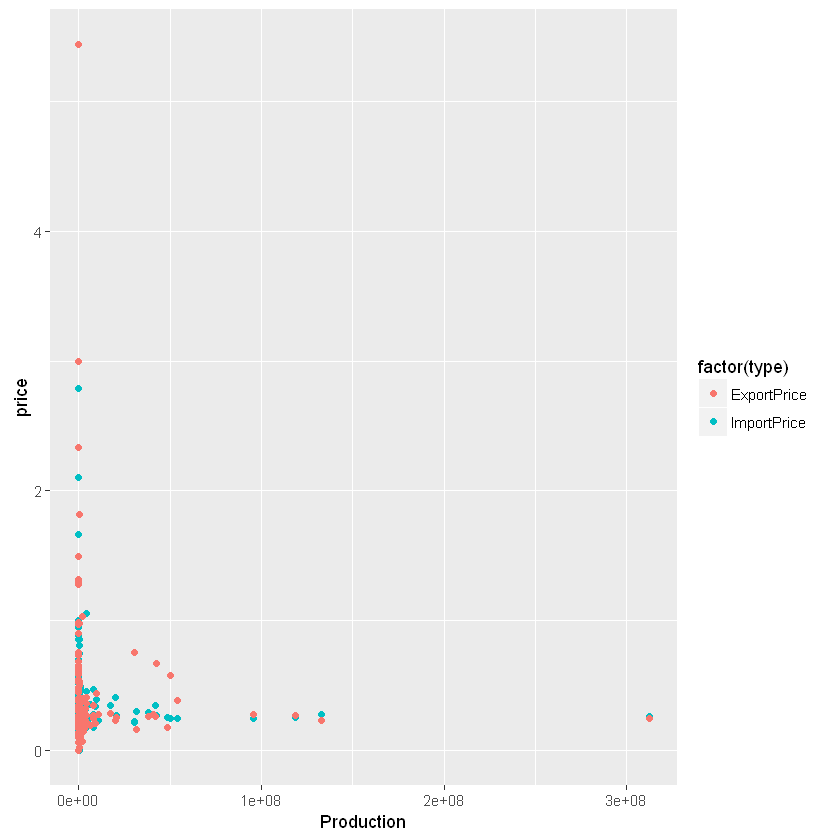

In [5]:
# outlier 
dat.long %>% ggplot(aes(Production, price) ) +
  geom_point(aes(colour = factor(type)))



###  Compare import and export price

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 69 rows containing non-finite values (stat_bin).

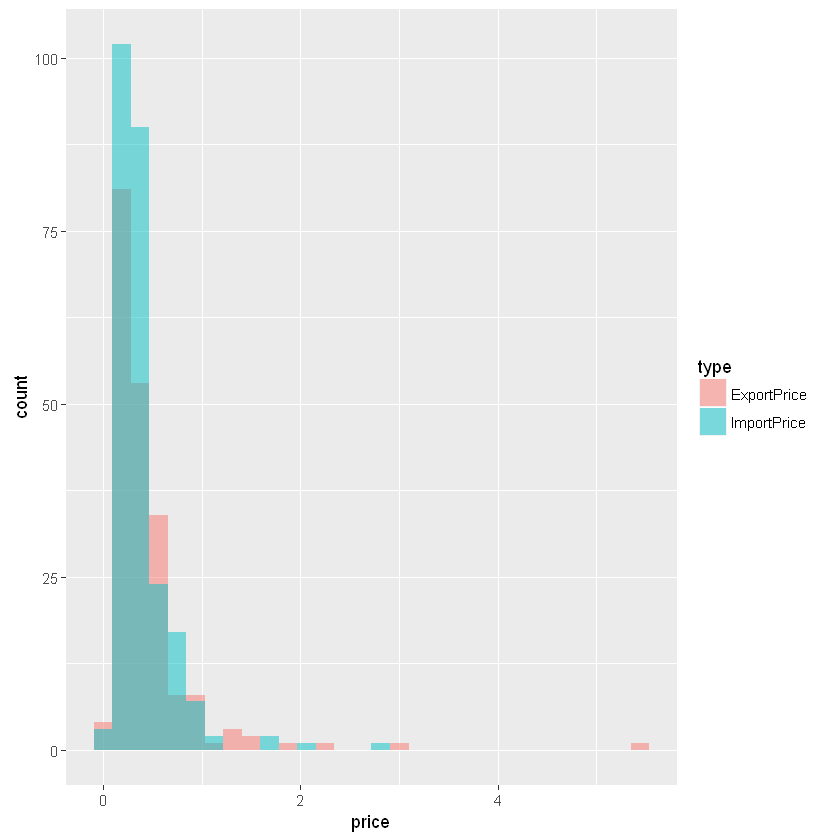

In [7]:
# Compare import and export price
dat.long %>%  ggplot(aes(price, fill=type))+ 
  geom_histogram(alpha=0.5, position="identity")


In log form

Warning message:
: Removed 195 rows containing missing values (geom_point).

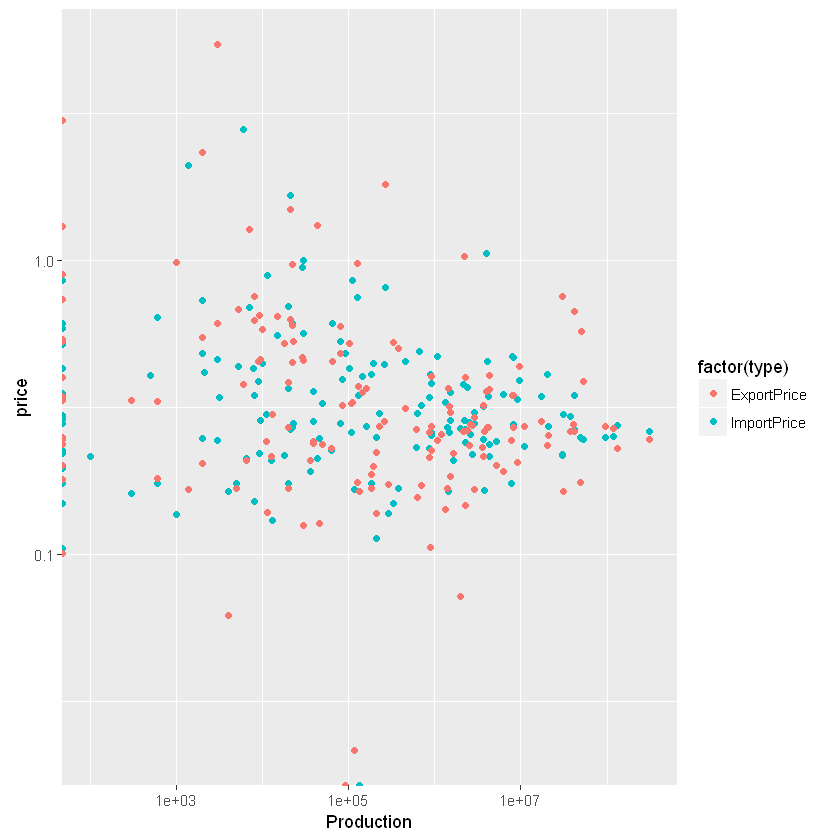

In [6]:
# log price and production
dat.long %>% ggplot(aes(Production, price) ) +
  geom_point(aes(colour = factor(type)))+ scale_y_log10() + scale_x_log10()